In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

%matplotlib inline
pd.options.display.max_rows = 200

In [2]:
db_url = 'postgresql+psycopg2://localhost:5432/postgres'
engine = create_engine(db_url)

In [3]:
query = """
SELECT
    CASE WHEN employer_name LIKE '%%GOOGLE%%' THEN 'Google'
         WHEN employer_name LIKE '%%FACEBOOK%%' THEN 'Facebook'
         WHEN employer_name LIKE '%%NETFLIX%%' THEN 'Netflix'
         WHEN employer_name LIKE '%%UBER%%' THEN 'Uber'
         WHEN employer_name LIKE '%%AIRBNB%%' THEN 'Airbnb'
         WHEN employer_name LIKE '%%LYFT%%' THEN 'Lyft'
         WHEN employer_name LIKE '%%APPLE%%' THEN 'Apple'
         WHEN employer_name LIKE '%%AMAZON%%' THEN 'Amazon'
         WHEN employer_name LIKE '%%MICROSOFT%%' THEN 'Microsoft'
         WHEN employer_name LIKE '%%LINKEDIN%%' THEN 'Linkedin'
         WHEN employer_name LIKE '%%THUMBTACK%%' THEN 'Thumbtack'
         WHEN employer_name LIKE '%%ROKU%%' THEN 'Roku'
         WHEN employer_name LIKE '%%ADOBE%%' THEN 'Adobe'
         WHEN employer_name LIKE '%%STITCH FIX%%' THEN 'Stitch Fix'
         WHEN employer_name LIKE '%%DROPBOX%%' THEN 'Dropbox'
         WHEN employer_name LIKE '%%WORKDAY%%' THEN 'Workday'
         WHEN employer_name LIKE '%%SLACK%%' THEN 'Slack'
         WHEN employer_name LIKE '%%STRIPE%%' THEN 'Stripe'
         WHEN employer_name LIKE '%%TWITTER%%' THEN 'Twitter'
         WHEN employer_name LIKE '%%GITHUB%%' THEN 'Github'
         WHEN employer_name LIKE '%%COINBASE%%' THEN 'Coinbase'
         WHEN employer_name LIKE '%%PINTEREST%%' THEN 'Pinterest'
         WHEN employer_name LIKE '%%SALESFORCE%%' THEN 'Salesforce'
         WHEN employer_name LIKE '%%ORACLE%%' THEN 'Oracle'
         ELSE NULL END AS company,
    CASE WHEN (job_title LIKE '%%SOFTWARE ENGINEER%%' 
            OR job_title LIKE '%%MEMBER OF TECHNICAL STAFF%%' 
            OR job_title LIKE '%%MTS%%') 
          AND (job_title NOT LIKE '%%MANAGER%%' 
           AND job_title NOT LIKE '%%DIRECTOR%%' 
           AND job_title NOT LIKE '%%HEAD%%' 
           AND job_title NOT LIKE '%%VP%%' 
           AND job_title NOT LIKE '%%PRESIDENT%%' 
           AND job_title NOT LIKE '%%CHIEF%%') THEN 'software engineer'
         WHEN (job_title LIKE '%%DATA SCIENTIST%%' 
            OR job_title LIKE '%%DATA SCIENCE%%') 
          AND (job_title NOT LIKE '%%MANAGER%%' 
           AND job_title NOT LIKE '%%DIRECTOR%%' 
           AND job_title NOT LIKE '%%HEAD%%' 
           AND job_title NOT LIKE '%%VP%%' 
           AND job_title NOT LIKE '%%PRESIDENT%%' 
           AND job_title NOT LIKE '%%CHIEF%%') THEN 'data scientist'
         WHEN job_title LIKE '%%PRODUCT MANAGER%%' THEN 'product manager'
         ELSE LOWER(job_title) END AS role,
    worksite_city AS city, 
    worksite_state AS state, 
    prevailing_wage AS minimum_salary, 
    wage_rate_of_pay_from AS base_salary 
FROM h1b_salary
WHERE case_status = 'CERTIFIED'
AND (employer_name LIKE '%%GOOGLE%%'
  OR employer_name LIKE '%%FACEBOOK%%'
  OR employer_name LIKE '%%NETFLIX%%'
  OR employer_name LIKE '%%UBER%%'
  OR employer_name LIKE '%%AIRBNB%%'
  OR employer_name LIKE '%%LYFT%%'
  OR employer_name LIKE '%%APPLE%%'
  OR employer_name LIKE '%%AMAZON%%'
  OR employer_name LIKE '%%MICROSOFT%%'
  OR employer_name LIKE '%%LINKEDIN%%'
  OR employer_name LIKE '%%THUMBTACK%%'
  OR employer_name LIKE '%%ROKU%%'
  OR employer_name LIKE '%%ADOBE%%'
  OR employer_name LIKE '%%STITCH FIX%%'
  OR employer_name LIKE '%%PINTEREST%%'
  OR employer_name LIKE '%%WORKDAY%%'
  OR employer_name LIKE '%%SLACK%%'
  OR employer_name LIKE '%%STRIPE%%'
  OR employer_name LIKE '%%TWITTER%%'
  OR employer_name LIKE '%%GITHUB%%'
  OR employer_name LIKE '%%COINBASE%%'
  OR employer_name LIKE '%%SALESFORCE%%'
  OR employer_name LIKE '%%ORACLE%%'
  OR employer_name LIKE '%%DROPBOX%%')
AND wage_unit_of_pay = 'Year'
AND case_submitted >= '2015-06-01'
AND employment_start_date >= '2015-06-01'
AND worksite_state IN ('CA', 'NY', 'WA')
"""
df = pd.read_sql(query, engine)

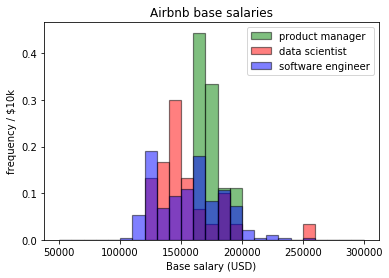

In [4]:
bin_size = 10000
bin_range = (50000, 300000)
bins = (bin_range[1]-bin_range[0])//bin_size
company = 'Airbnb'
roles = ['product manager', 'data scientist', 'software engineer']
colors = ['green', 'red', 'blue']
for i, role in enumerate(roles):
    company_df = df[(df.company == company) & (df.role == role)]
    weights = np.zeros_like(company_df.base_salary) + 1. / company_df.base_salary.size
    plt.hist(company_df.base_salary, bins=bins, range=bin_range, weights=weights, color=colors[i], alpha=0.5, edgecolor='black', label=role, linewidth=1.2)
plt.title('{} base salaries'.format(company))
plt.xlabel('Base salary (USD)')
plt.ylabel('frequency / ${}k'.format(bin_size//1000))
plt.legend()
plt.show()

In [5]:
df[df.role.isin(['software engineer', 'product manager', 'data scientist'])] \
    .groupby(['company', 'role']) \
    .agg({'base_salary': ['median', 'min', 'max', 'mean', 'count']}) \
    .base_salary \
    .reset_index() \
    .sort_values(['company','median', 'role'], ascending=[True, False, True]) \
    .set_index(['company', 'role'])

median       min        max           mean  \
company    role                                                               
Adobe      data scientist     138923.00   74547.0  172515.00  125724.857143   
           product manager    117884.00   71781.0  205000.00  126615.431667   
           software engineer  110116.00   55682.0  205000.00  111920.368421   
Airbnb     product manager    170000.00  160500.0  190000.00  171722.222222   
           software engineer  155000.00  107000.0  259157.00  154494.451433   
           data scientist     145000.00  123000.0  253629.79  152005.570000   
Amazon     product manager    130000.00   65208.0  185000.00  125995.561584   
           software engineer  130000.00   90000.0  132500.00  117500.000000   
           data scientist     125000.00  100000.0  160000.00  128571.428571   
Apple      software engineer  140000.00   72000.0  223000.00  140206.238971   
           product manager    139000.00  130000.0  140000.00  137000.000000   
           data scientist     135387.00  111717.0  175000.00  143117.352941   
Coinbase   software engineer  135350.00  115000.0  148000.00  133962.500000   
Dropbox    software engineer  136573.00   80184.0  211000.00  137995.255858   
           product manager    134389.00  110000.0  165000.00  136019.857143   
           data scientist     130000.00  119642.0  150000.00  131547.333333   
Facebook   product manager    160000.00  105000.0  240000.00  157340.702360   
           software engineer  151007.06  100000.0  297093.00  155501.550000   
           data scientist     135000.00   90000.0  184000.00  137006.259070   
Github     software engineer  200000.00  200000.0  200000.00  200000.000000   
           product manager    135000.00  135000.0  135000.00  135000.000000   
Google     product manager    138500.00  110000.0  267000.00  147829.325397   
           software engineer  132000.00   92000.0  335000.00  134509.427489   
           data scientist     120000.00  106550.0  156000.00  127516.666667   
Linkedin   software engineer  124675.00   93000.0  169749.00  129859.929193   
           product manager    124093.00   94500.0  190195.00  124029.192308   
           data scientist     115211.00   95035.0  139672.00  115429.380952   
Lyft       product manager    182500.00  100000.0  240000.00  179375.000000   
           software engineer  160000.00  110000.0  250000.00  157958.257143   
           data scientist     147000.00  124000.0  165000.00  147352.941176   
Microsoft  product manager    150000.00  112500.0  172800.00  145114.285714   
           software engineer  130000.00   84739.0  231000.00  132542.472539   
           data scientist     127000.00   86400.0  190000.00  129792.194915   
Netflix    software engineer  164382.00  102149.0  200000.00  163680.673077   
           data scientist     162884.50  100214.0  180877.00  154269.500000   
           product manager    155147.00  125549.0  230506.00  170400.666667   
Oracle     product manager    127977.00   80184.0  218015.00  132417.555556   
           data scientist     100000.00   96013.0  100000.00   99202.600000   
Pinterest  data scientist     111500.00  100000.0  138486.00  116676.571429   
           software engineer  111500.00   76107.0  153774.00  116790.571429   
           product manager    108750.00  108750.0  111500.00  109437.500000   
Roku       software engineer  200000.00  120349.0  325000.00  200298.682927   
           product manager    197500.00  175000.0  220000.00  197500.000000   
Salesforce software engineer  135990.00   71240.0  169749.00  127558.494266   
           product manager    122949.00  106746.0  163134.00  129449.031250   
           data scientist     119642.00   78666.0  169749.00  122951.416667   
Slack      software engineer  119000.00  108000.0  130000.00  119000.000000   
Stitch Fix software engineer  147846.00   98987.0  170000.00  138944.333333   
           data scientist     123594.00   85862.0  150000.00  122921.777778   
Stri

In [6]:
from collections import Counter
    
def find_index(n, nums):
    lo, hi = 0, len(nums)-1
    
    while lo < hi:
        mid = (lo+hi)//2
        if nums[mid-1] < n <= nums[mid]:
            return mid
        elif mid == 0:
            return 0
        elif n < nums[mid]:
            hi = mid
        else:
            lo = mid+1

    return len(nums)

def percentile(base, company, role):
    salaries = df[(df.company == company) & (df.role == role)].base_salary.tolist()
    salary_count = Counter(salaries)
    salary_tuple = [(k, v) for k, v in salary_count.items()]
    sorted_salaries = sorted(salary_tuple, key = lambda x: x[0])
    
    index = find_index(base, [x[0] for x in sorted_salaries])
    vals = sum([v for k, v in sorted_salaries[:index]])
    percentile = round(float(vals)/(len(salaries)+1)*100)
    output = 'A base salary of ${} is {}th percentile for a {} at {}'.format(base, percentile, role, company)
    
    return output

In [7]:
print(percentile(170000, 'Airbnb', 'data scientist'))

A base salary of $170000 is 77th percentile for a data scientist at Airbnb
